
## tf.Tensor: 텐서 객체
- 텐서는 다차원 배열로 넘파이(NumPy) ndarray 객체와 비슷하며,
- tf.Tensor 객체는 데이터 타입과 크기를 가지고 있다.
- 또한 tf.Tensor는 GPU 같은 가속기 메모리에 상주할 수 있다.
- 텐서플로는 텐서를 생성하고 이용하는 풍부한 연산 라이브러리(tf.add, tf.matmul, tf.linalg.inv 등.)를 제공하며
- 연산수행 시 자동으로 텐서를 파이썬 네이티브(native) 타입으로 변환하여 연산한다


## Linear Regression(선형 회귀)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def hypothesis(X):
    return X*W + b

W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

In [2]:
xy = np.loadtxt('data-01-cars.csv',unpack=True,delimiter=',',skiprows=1)
x_train = xy[0]
y_train = xy[1]

In [5]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)

def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

In [6]:
print('****** Start Learning!!')
for step in range(10001):
    # cost를 minimize 한다
    optimizer.minimize(cost_func,var_list=[W,b]) # W,b를 업데이트
    if step % 1000 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
        
print('****** Learning Finished!!')

****** Start Learning!!
0000 cost:[ 2264.8562 ]  W: [0.18908505]  b: [-0.599391]
1000 cost:[ 262.9711 ]  W: [2.8413503]  b: [1.0352355]
2000 cost:[ 254.48282 ]  W: [2.9792976]  b: [-1.3132044]
3000 cost:[ 244.33559 ]  W: [3.1762705]  b: [-4.6699195]
4000 cost:[ 235.37073 ]  W: [3.4083567]  b: [-8.62811]
5000 cost:[ 229.74469 ]  W: [3.6350622]  b: [-12.4982815]
6000 cost:[ 227.52344 ]  W: [3.8100502]  b: [-15.487862]
7000 cost:[ 227.09601 ]  W: [3.9033275]  b: [-17.082035]
8000 cost:[ 227.07065 ]  W: [3.92972]  b: [-17.533134]
9000 cost:[ 227.0704 ]  W: [3.9323583]  b: [-17.578234]
10000 cost:[ 227.07043 ]  W: [3.9324028]  b: [-17.578993]
****** Learning Finished!!


In [8]:
print('Weight:',W.numpy())
print('bias:', b.numpy())

Weight: [3.9324028]
bias: [-17.578993]


In [7]:
print('******* Predict')
print('speed = 30, dist =',hypothesis(30).numpy())
print('speed = 50, dist =' ,hypothesis(50).numpy())
print('speed = [10,11,12,24,25], dist =' ,hypothesis([10,11,12,24,25]).numpy())


******* Predict
speed = 30, dist = [100.39309]
speed = 50, dist = [179.04115]
speed = [10,11,12,24,25], dist = [21.745035 25.677439 29.609842 76.798676 80.73108 ]


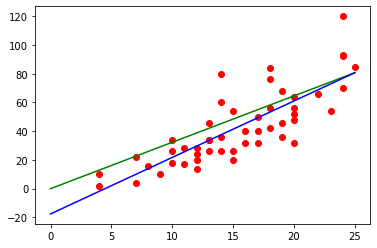

In [9]:
def prediction(X,W,b):
    return X*W + b

plt.plot(x_train,y_train,'ro')  # Red      , 원본 데이터
plt.plot((0,25),(0,prediction(25,W,b)),'g' ) # Green
plt.plot((0,25),(prediction(0,W,b),prediction(25,W,b)),'b' ) # Blue, 예측함수

## multi-variable regression

In [10]:
x_data = [[73.,80.,75.],
          [93.,88.,93.],
          [89.,91.,90.],
          [96.,98.,100.],
          [73.,66.,70.]]

y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]
x_train = np.array(x_data,dtype=np.float32)
y_train = np.array(y_data,dtype=np.float32)
x_train.shape, y_train.shape


((5, 3), (5, 1))

In [11]:
W = tf.Variable(tf.random.normal([3,1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

In [13]:
def hypothesis(X):
    return tf.matmul(X,W) + b

def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [14]:
print('****** Start Learning!!')
for step in range(10001):
    # cost를 minimize 한다
    optimizer.minimize(cost_func,var_list=[W,b]) # W,b를 업데이트
    if step % 1000 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
        
print('****** Learning Finished!!')

****** Start Learning!!
0000 cost:[ 1529.6576 ]  W: [[ 0.80049396]
 [ 1.2378209 ]
 [-0.47239298]]  b: [0.18264486]
1000 cost:[ 5.495414 ]  W: [[ 1.1002643]
 [ 1.1784681]
 [-0.2594227]]  b: [0.24770449]
2000 cost:[ 1.5064967 ]  W: [[ 1.283801  ]
 [ 0.8958916 ]
 [-0.15864071]]  b: [-0.0270252]
3000 cost:[ 0.5813728 ]  W: [[ 1.3570039 ]
 [ 0.7257565 ]
 [-0.05712143]]  b: [-0.53745604]
4000 cost:[ 0.37957332 ]  W: [[1.3287147 ]
 [0.66226935]
 [0.0406706 ]]  b: [-1.1578944]
5000 cost:[ 0.28009015 ]  W: [[1.2709503 ]
 [0.6284294 ]
 [0.13627137]]  b: [-1.5999632]
6000 cost:[ 0.2367926 ]  W: [[1.213914  ]
 [0.59960395]
 [0.22078538]]  b: [-1.5710145]
7000 cost:[ 0.20512009 ]  W: [[1.1560304 ]
 [0.5723327 ]
 [0.29814255]]  b: [-0.9801866]
8000 cost:[ 0.17042173 ]  W: [[1.0866331 ]
 [0.5406728 ]
 [0.38643366]]  b: [0.02588961]
9000 cost:[ 0.14574754 ]  W: [[1.0247345 ]
 [0.51259476]
 [0.46490264]]  b: [0.9571118]
10000 cost:[ 0.13027832 ]  W: [[0.97552395]
 [0.49013624]
 [0.52670574]]  b: [1.694

In [15]:
print('Weight:',W.numpy())
print('bias:', b.numpy())

Weight: [[0.97552395]
 [0.49013624]
 [0.52670574]]
bias: [1.6942343]


In [16]:
x_data = [[73.,80.,75.],
          [93.,88.,93.],
          [89.,91.,90.],
          [96.,98.,100.],
          [73.,66.,70.]]
x_test = np.array(x_data,dtype=np.float32)
print(hypothesis(x_test).numpy())


[[151.6213 ]
 [184.53358]
 [180.52177]
 [196.04846]
 [142.12587]]


In [17]:
xy = np.loadtxt('data-02-test-score.csv', delimiter=',',skiprows=1,dtype=np.float32)
x_train = xy[:,:-1]
y_train = xy[:,-1:] #차원 유지
y_train.shape

(25, 1)

In [18]:
def hypothesis(X):
    return tf.matmul(X,W) + b

def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

optimizer = tf.keras.optimizers.Adam(lr=0.01)

print('****** Start Learning!!')
for step in range(10001):
    # cost를 minimize 한다
    optimizer.minimize(cost_func,var_list=[W,b]) # W,b를 업데이트
    if step % 1000 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
        
print('****** Learning Finished!!')

****** Start Learning!!
0000 cost:[ 18.299934 ]  W: [[0.98552394]
 [0.50013626]
 [0.53670573]]  b: [1.7042342]
1000 cost:[ 5.804386 ]  W: [[0.35678148]
 [0.53726786]
 [1.149386  ]]  b: [-2.4784172]
2000 cost:[ 5.738986 ]  W: [[0.35591963]
 [0.54194105]
 [1.1657119 ]]  b: [-4.1691995]
3000 cost:[ 5.737807 ]  W: [[0.35594386]
 [0.54248923]
 [1.1673429 ]]  b: [-4.325735]
4000 cost:[ 5.738285 ]  W: [[0.35584864]
 [0.54242724]
 [1.1673495 ]]  b: [-4.33564]
5000 cost:[ 5.7378087 ]  W: [[0.35593364]
 [0.54251426]
 [1.1674395 ]]  b: [-4.3360834]
6000 cost:[ 5.7391267 ]  W: [[0.35578904]
 [0.54236954]
 [1.1672949 ]]  b: [-4.336249]
7000 cost:[ 5.7378044 ]  W: [[0.3559386]
 [0.5425186]
 [1.1674442]]  b: [-4.336101]
8000 cost:[ 5.737824 ]  W: [[0.355924 ]
 [0.5425046]
 [1.1674302]]  b: [-4.336115]
9000 cost:[ 5.7378016 ]  W: [[0.35593808]
 [0.54251873]
 [1.1674442 ]]  b: [-4.3361044]
10000 cost:[ 5.737814 ]  W: [[0.35593402]
 [0.5425146 ]
 [1.16744   ]]  b: [-4.3361063]
****** Learning Finished!!